## Profiling analysis

In [1]:
import pandas as pd

In [2]:
full_data=pd.read_json('../json/data.json')

Only 3 columns have missing values: `runtime`, `image`, and `summary`. I think that `image` and `summary` are ok becauase they are optional to have some data. It would be useful to research why `runtime` has missing values and if there is any way to make the data more complete

In [ ]:
missing_percentage = (full_data.isnull().sum() / len(full_data)) * 100
print(missing_percentage)

id            0.000000
url           0.000000
name          0.000000
season        0.000000
number        0.000000
type          0.000000
airdate       0.000000
airtime       0.000000
airstamp      0.000000
runtime      15.706806
rating        0.000000
image        76.963351
summary      63.350785
_links        0.000000
_embedded     0.000000
dtype: float64


Overall, data types seem to be correct, but some columns columns need corrections like `airstamp` and `airdate` (dates) as well as `rating`, which is represented as JSON but can be stored as a float value.

In [4]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         191 non-null    int64  
 1   url        191 non-null    object 
 2   name       191 non-null    object 
 3   season     191 non-null    int64  
 4   number     191 non-null    int64  
 5   type       191 non-null    object 
 6   airdate    191 non-null    object 
 7   airtime    191 non-null    object 
 8   airstamp   191 non-null    object 
 9   runtime    161 non-null    float64
 10  rating     191 non-null    object 
 11  image      44 non-null     object 
 12  summary    70 non-null     object 
 13  _links     191 non-null    object 
 14  _embedded  191 non-null    object 
dtypes: float64(1), int64(3), object(11)
memory usage: 22.5+ KB
None


The column `summary` could be cleaned by removing the HTML tags which are not needed, and the `image` column could be split in two other column given that its JSON structure is stable across the observations

In [7]:
full_data.tail(3)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,_embedded
188,2731565,https://www.tvmaze.com/episodes/2731565/maine-...,A Twofer in West Gardiner,9,8,regular,2024-01-01,21:00,2024-01-02T02:00:00+00:00,60.0,{'average': None},{'medium': 'https://static.tvmaze.com/uploads/...,<p>The Maine Cabin Masters update a pair of ca...,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 23972, 'url': 'https://www.tvm..."
189,2732336,https://www.tvmaze.com/episodes/2732336/alle-e...,"Stor, lykkelig familie",5,1,regular,2024-01-01,03:00,2024-01-02T02:00:00+00:00,20.0,{'average': None},None,<p>David and Andrea will organize Norway's big...,{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 54476, 'url': 'https://www.tvm..."
190,3045036,https://www.tvmaze.com/episodes/3045036/making...,Derrick Todd Lee,2,1,regular,2024-01-01,00:00,2024-01-02T05:00:00+00:00,43.0,{'average': None},{'medium': 'https://static.tvmaze.com/uploads/...,"<p>Derrick Todd Lee, known as the Baton Rouge ...",{'self': {'href': 'https://api.tvmaze.com/epis...,"{'show': {'id': 69960, 'url': 'https://www.tvm..."


Columns like type and airdate only have one value, these means that they might be removed, but I would keep both in case they change in the future. Also, the airdate column maybe necessary to store the date in case we may want to add more observations from this API in the future.
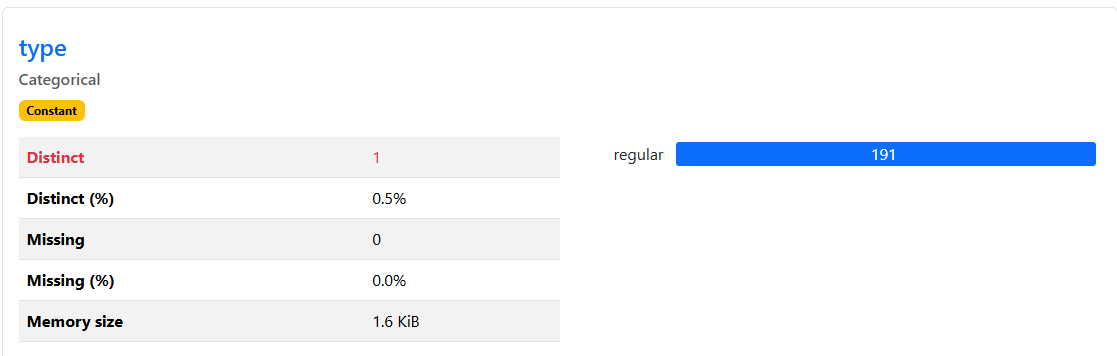

An analysis about interactions and correlations is not needed because we are not checking variables for a model. The check was only needed to inspect the quality of the data. As a result, some adjustments will be done towards the data so that is a more complete and correct format for posterior analysis or usage.